# Task 2: Unemployment Analysis using Python

## Objective
To analyze unemployment trends using Python and extract meaningful insights through data visualization.


In [3]:
import pandas as pd
import numpy as np 
import matplotlib as mlp 
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv(r"../data/task2/Unemployment_Rate_upto_11_2020.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [18]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [19]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [21]:
#check for missing values
df.isnull().sum()

#data types
df.dtypes

Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                           int64
 Estimated Labour Participation Rate (%)    float64
Region.1                                     object
longitude                                   float64
latitude                                    float64
dtype: object

In [23]:
df[' Frequency'].unique()
df[' Frequency'].value_counts()

 Frequency
M    267
Name: count, dtype: int64

In [24]:
# object to date conversion
df[' Date'] = pd.to_datetime(df[' Date'])
df.dtypes

C:\Users\niket\AppData\Local\Temp\ipykernel_11320\3541518002.py:2: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[' Date'] = pd.to_datetime(df[' Date'])


Region                                              object
 Date                                       datetime64[ns]
 Frequency                                          object
 Estimated Unemployment Rate (%)                   float64
 Estimated Employed                                  int64
 Estimated Labour Participation Rate (%)           float64
Region.1                                            object
longitude                                          float64
latitude                                           float64
dtype: object

In [ ]:
# removing extra spaces for the column names
df.columns = df.columns.str.strip()

# print columns names in different forms
#df.columns
#list(df.columns)
for col in df.columns:
    print(col)

Region
Date
Estimated Unemployment Rate (%)
Estimated Employed
Estimated Labour Participation Rate (%)
Region.1
longitude
latitude


In [ ]:
# dropping the frequency column as it has no variations in it, which is not neccessary for analysis.
df = df.drop(columns=['Frequency'])

In [ ]:
mon_unemp = df.groupby('Date')['Estimated Unemployment Rate (%)'].mean()
mon_unemp.head()

Date
2020-06-30    10.911111
2020-07-31     9.834444
2020-08-31    10.313333
2020-09-30     8.705926
2020-10-31     8.026296
Name: Estimated Unemployment Rate (%), dtype: float64

In [41]:
mon_unemp.tail()

Date
2020-06-30    10.911111
2020-07-31     9.834444
2020-08-31    10.313333
2020-09-30     8.705926
2020-10-31     8.026296
Name: Estimated Unemployment Rate (%), dtype: float64

In [44]:
mon_unemp.shape
#df['Date'].nunique()


(10,)

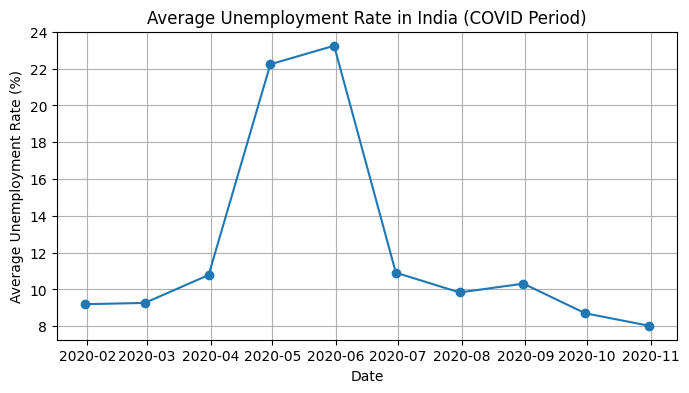

In [60]:
plt.figure(figsize=(8,4))
plt.plot(mon_unemp.index, mon_unemp.values, marker='o')
plt.xlabel('Date')
plt.ylabel('Average Unemployment Rate (%)')
plt.title('Average Unemployment Rate in India (COVID Period)')
plt.grid(True)
plt.show()

In [62]:
zone_unemp = df.groupby('Region.1')['Estimated Unemployment Rate (%)'].mean()
zone_unemp


Region.1
East         13.916000
North        15.889620
Northeast    10.950263
South        10.454667
West          8.239000
Name: Estimated Unemployment Rate (%), dtype: float64

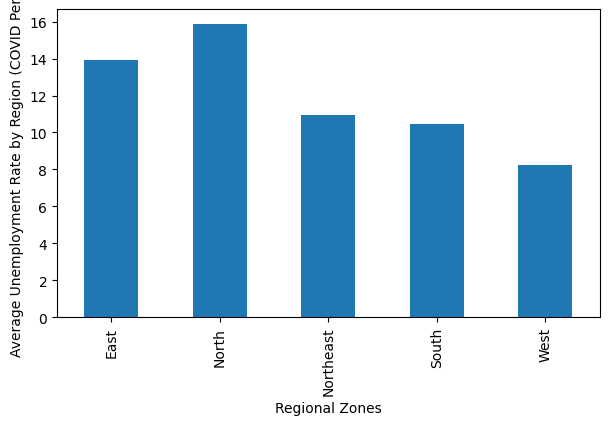

In [69]:
plt.figure(figsize=(7,4))
zone_unemp.plot(kind='bar')
plt.xlabel('Regional Zones')
plt.ylabel('Average Unemployment Rate by Region (COVID Period)')
plt.show()

## Conclusion
The analysis reveals that unemployment in India peaked during the early months of the COVID-19 pandemic and gradually declined as economic activities resumed. Region-wise analysis shows that the Northern region was the most affected, while the Western region experienced relatively lower unemployment. These variations highlight the uneven economic impact of the pandemic across regions and emphasize the role of industrial structure and workforce composition in recovery patterns.


## Unemployment Analysis from Dataset 2: Unemployment in India

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# extracting the dataset 2
df = pd.read_csv(r"../data/task2/Unemployment in India.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [5]:
df.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [8]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [ ]:
# Remove fully empty rows
df = df.dropna(how='all')
df.shape

(740, 7)

In [14]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Date'].dtype

dtype('<M8[ns]')

In [15]:
df.columns = df.columns.str.strip()
df.columns


Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

## COVID vs Pre-COVID Impact Analysis

In [17]:
# Create COVID period column 
df['Period'] = df['Date'].apply(
    lambda x: 'Pre-COVID' if x < pd.Timestamp('2020-03-01') else 'COVID'
)

df[['Date', 'Period']].head()


,Date,Period
0,2019-05-31,Pre-COVID
1,2019-06-30,Pre-COVID
2,2019-07-31,Pre-COVID
3,2019-08-31,Pre-COVID
4,2019-09-30,Pre-COVID


In [18]:
# Compare unemployment (Pre-COVID vs COVID)
df.groupby('Period')['Estimated Unemployment Rate (%)'].mean()


Period
COVID        17.774363
Pre-COVID     9.509534
Name: Estimated Unemployment Rate (%), dtype: float64

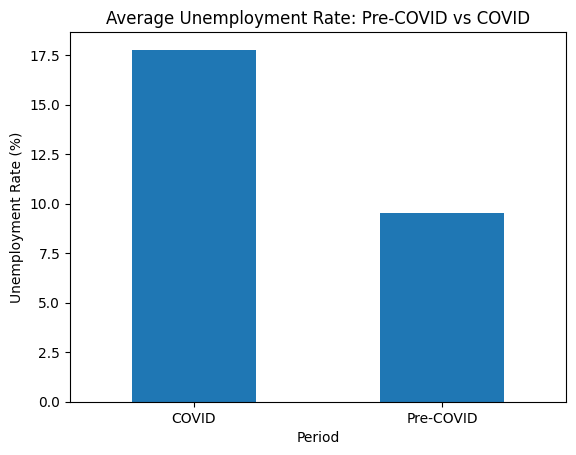

In [19]:
df.groupby('Period')['Estimated Unemployment Rate (%)'].mean().plot(
    kind='bar',
    title='Average Unemployment Rate: Pre-COVID vs COVID',
    ylabel='Unemployment Rate (%)',
    xlabel='Period',
    rot=0
)
plt.show()


In [20]:
# Rural vs Urban impact
df.groupby(['Period', 'Area'])['Estimated Unemployment Rate (%)'].mean()


Period     Area 
COVID      Rural    16.181313
           Urban    19.276381
Pre-COVID  Rural     8.094808
           Urban    10.842246
Name: Estimated Unemployment Rate (%), dtype: float64

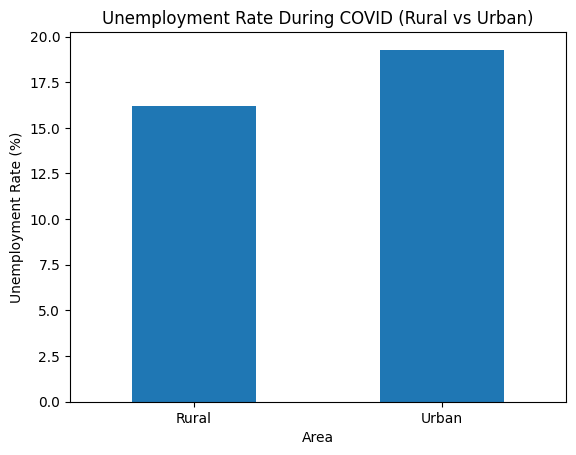

In [21]:
df[df['Period'] == 'COVID'].groupby('Area')['Estimated Unemployment Rate (%)'].mean().plot(
    kind='bar',
    title='Unemployment Rate During COVID (Rural vs Urban)',
    ylabel='Unemployment Rate (%)',
    rot=0
)
plt.show()


In [22]:
df[df['Period'] == 'COVID'].groupby('Region')['Estimated Unemployment Rate (%)'] \
    .mean() \
    .sort_values(ascending=False) \
    .head(10)


Region
Puducherry       38.95500
Jharkhand        36.34875
Haryana          34.65250
Bihar            31.63125
Tripura          26.70250
Tamil Nadu       25.40375
Delhi            22.15750
Kerala           17.95250
Uttar Pradesh    17.38250
Rajasthan        17.31125
Name: Estimated Unemployment Rate (%), dtype: float64

Conclusion:
This analysis highlights the significant impact of COVID-19 on employment in India. The average unemployment rate nearly doubled during the pandemic, with urban areas and service-dependent states being most affected. Migrant-heavy and industrial states experienced severe job losses, emphasizing the economic vulnerability exposed during the pandemic.